In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns #Visualization
#plt.rcParams['figure.figsize'] = [8,5]
#plt.rcParams['font.size'] = 14
#plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

C:\Users\marti\AppData\Local\Temp\ipykernel_2704\729287610.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [205]:
insurance = pd.read_csv('insurance.csv')

In [206]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Descriptive Statistics

In [207]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [208]:
insurance.shape

(1338, 7)

In [209]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [210]:
print(f'If we drop rows with at least one value missing, we get {insurance.dropna().shape[0]:,} \
out of {insurance.shape[0]:,} instances.')

If we drop rows with at least one value missing, we get 1,338 out of 1,338 instances.


In [211]:
insurance.median().to_frame().rename(columns = {0:'median'})

C:\Users\marti\AppData\Local\Temp\ipykernel_2704\192392232.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insurance.median().to_frame().rename(columns = {0:'median'})


,median
age,39.000
bmi,30.400
children,1.000
charges,9382.033


# Data Visualization 

#### We have mostly young people in the the dataset when I compare it against other ages, i.e. my portfolio is relatively young
#### People have mostly 0 children and are non-smokers

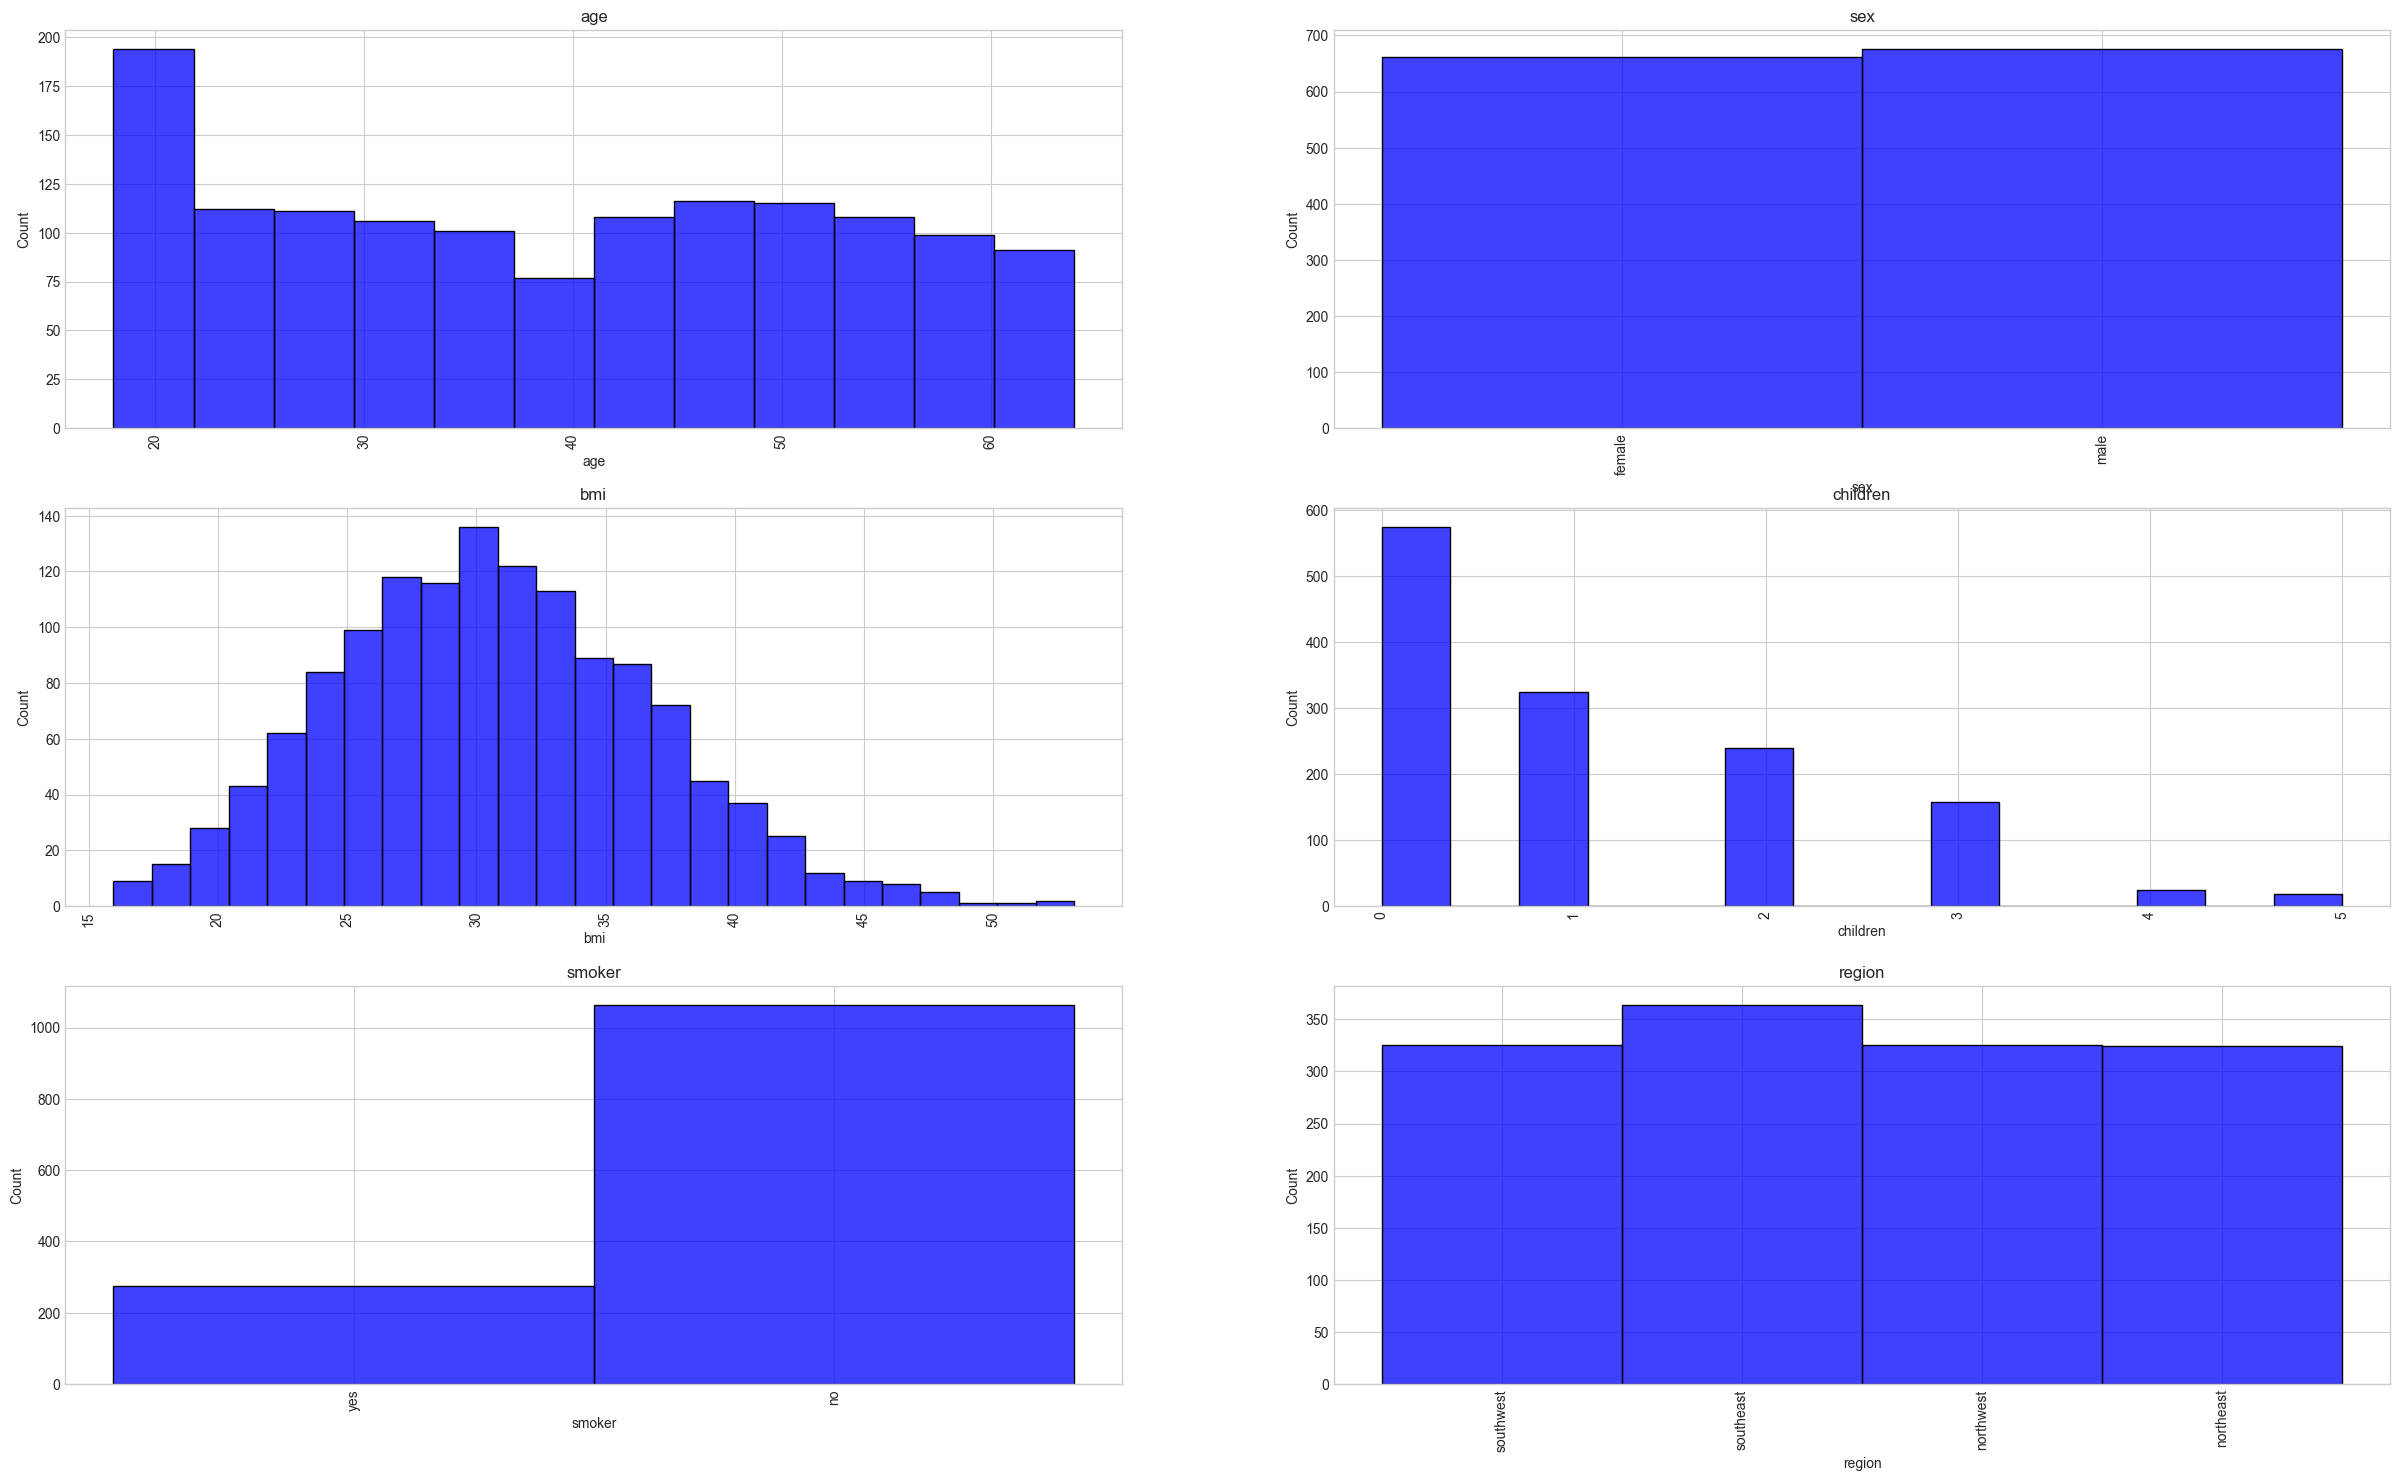

In [212]:
colnames = list(insurance.columns)
colnames.remove('charges')

count = 1
plt.figure(figsize=(30,30))
for col in colnames:
    plt.subplot(5,2,count)
    sns.histplot(data = insurance, x = col, color = 'blue')
    plt.xticks(rotation = 90)
    plt.title(col)
    count += 1

#### Distribution of the charges
 - original distribution of charges is left-hand skewed
 - I use log transformation to get 'normal' distribution of the dependent variable

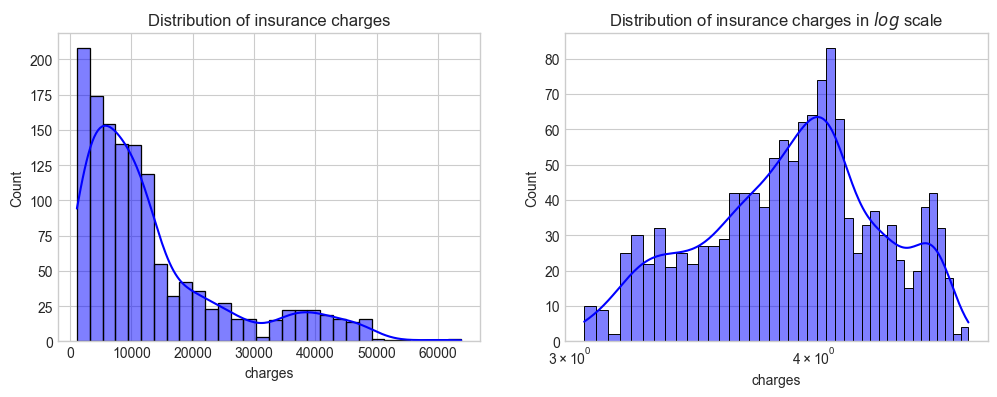

In [213]:
fig = plt.figure(figsize = (12,4))
ax2 = fig.add_subplot(121)
sns.histplot(data = insurance, x = 'charges', color = 'blue', kde = True) 
ax2.set_title('Distribution of insurance charges')

ax1 = fig.add_subplot(122)
sns.histplot(np.log10(insurance['charges']),bins=40, color='b', kde = True)
ax1.set_title('Distribution of insurance charges in $log$ scale')
ax1.set_xscale('log')


#### I also tried to look at scatterplots of continuous values vs charges but I don't see any significant trend in any of them

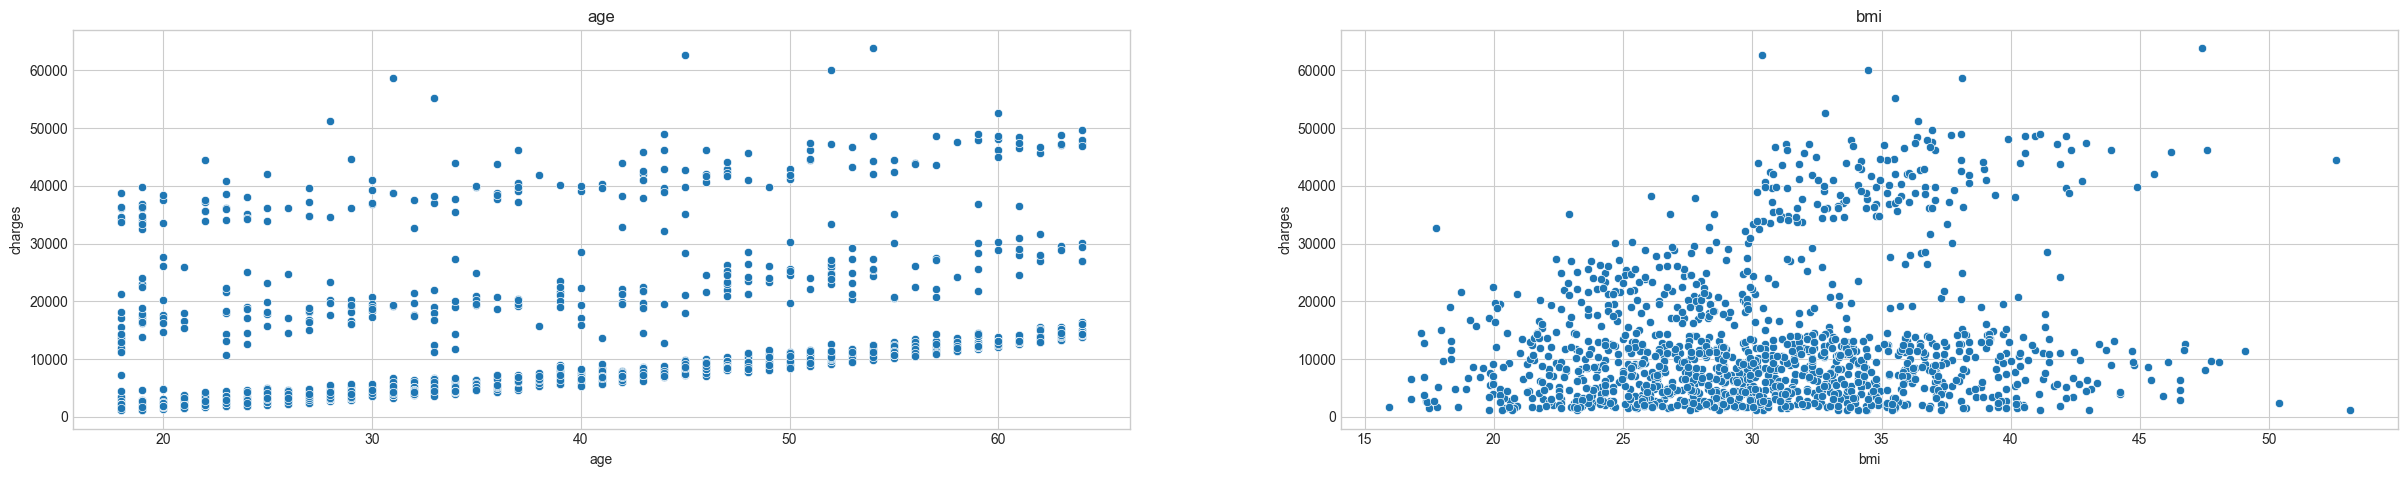

In [214]:
count = 1
plt.figure(figsize=(30,30))
for col in ['age','bmi']:
    plt.subplot(5,2,count)
    sns.scatterplot(data = insurance, x = col, y = 'charges')
    plt.title(col)
    count += 1


#### I also don't see any big correlations between continuous values

<AxesSubplot: >

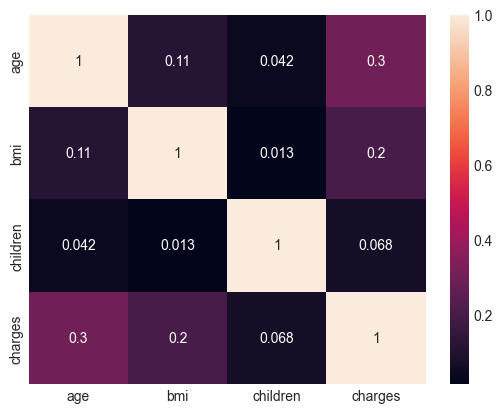

In [215]:
correlations = insurance.corr()
sns.heatmap(correlations, annot=True)

#### When I would include categorical variables as well I can see that smoking is a factor that correlates strongly with charges

<AxesSubplot: >

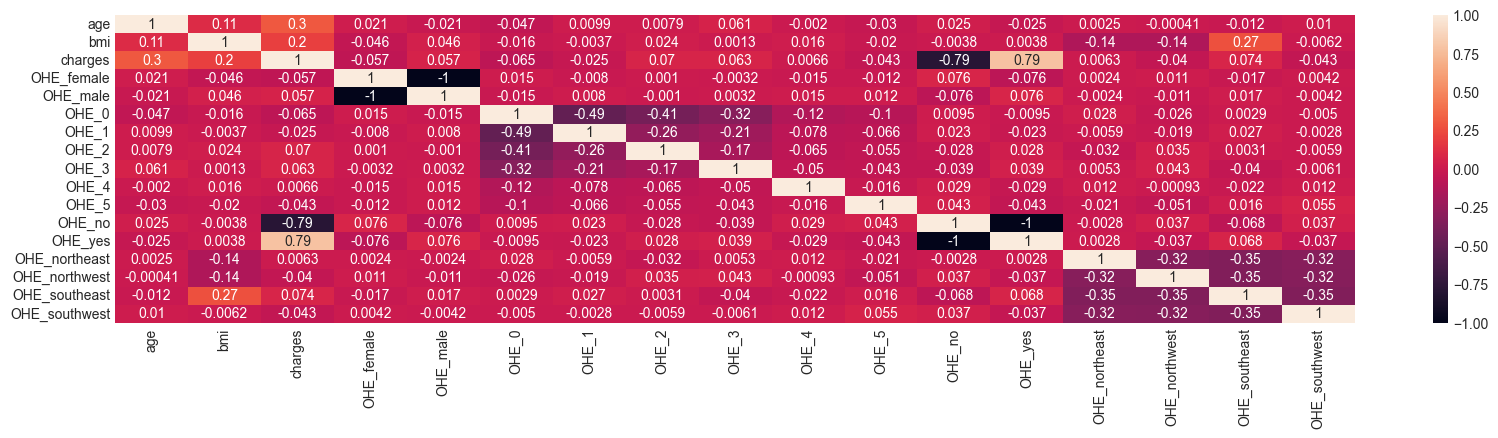

In [216]:
plt.figure(figsize = (20,4))

categorical_columns = ['sex','children', 'smoker', 'region']
insurance_encode_corr = pd.get_dummies(data = insurance, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =False,
              dtype='int8')

correlations = insurance_encode_corr.corr()
sns.heatmap(correlations, annot=True)

For the purpose of the exercise I will keep only the charts that are showing interesting trends, 
otherwise I consider other combinations to be equal between groups

**People in the southeast might have slightly higher BMIs compared to other regions, northeast slightly lower BMIs**

Text(0.5, 1.0, 'Regional distribution of BMIs')

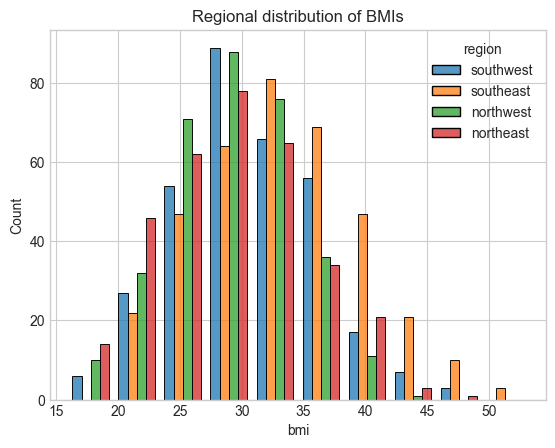

In [217]:
sns.histplot(data = insurance, x = 'bmi', hue = 'region', multiple="dodge", shrink=.8, bins = 10)
plt.title('Regional distribution of BMIs')

**It's understandable that people around their 20s have no kids, but interesting is that no children are prevalent among higher
ages as well**

Text(0.5, 1.0, 'Age distribution compared to the number of children')

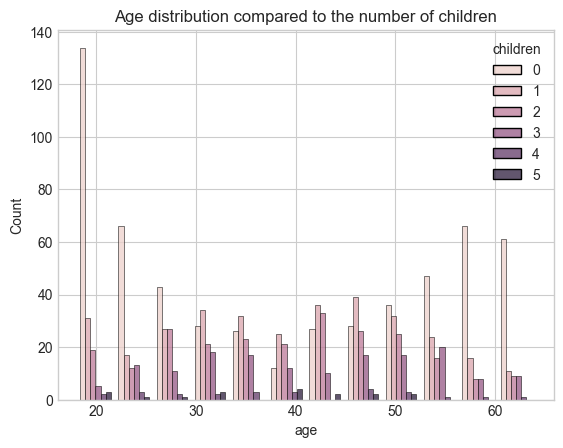

In [218]:
sns.histplot(data = insurance, x = 'age', hue = 'children', multiple="dodge", shrink=.8)
plt.title('Age distribution compared to the number of children')

 - **region southeast is showing different distribution as other regions**
 - **southeast has bmi mostly 31-39, other regions 23-31 bmi**
 - **higher the age, higher the bmi**

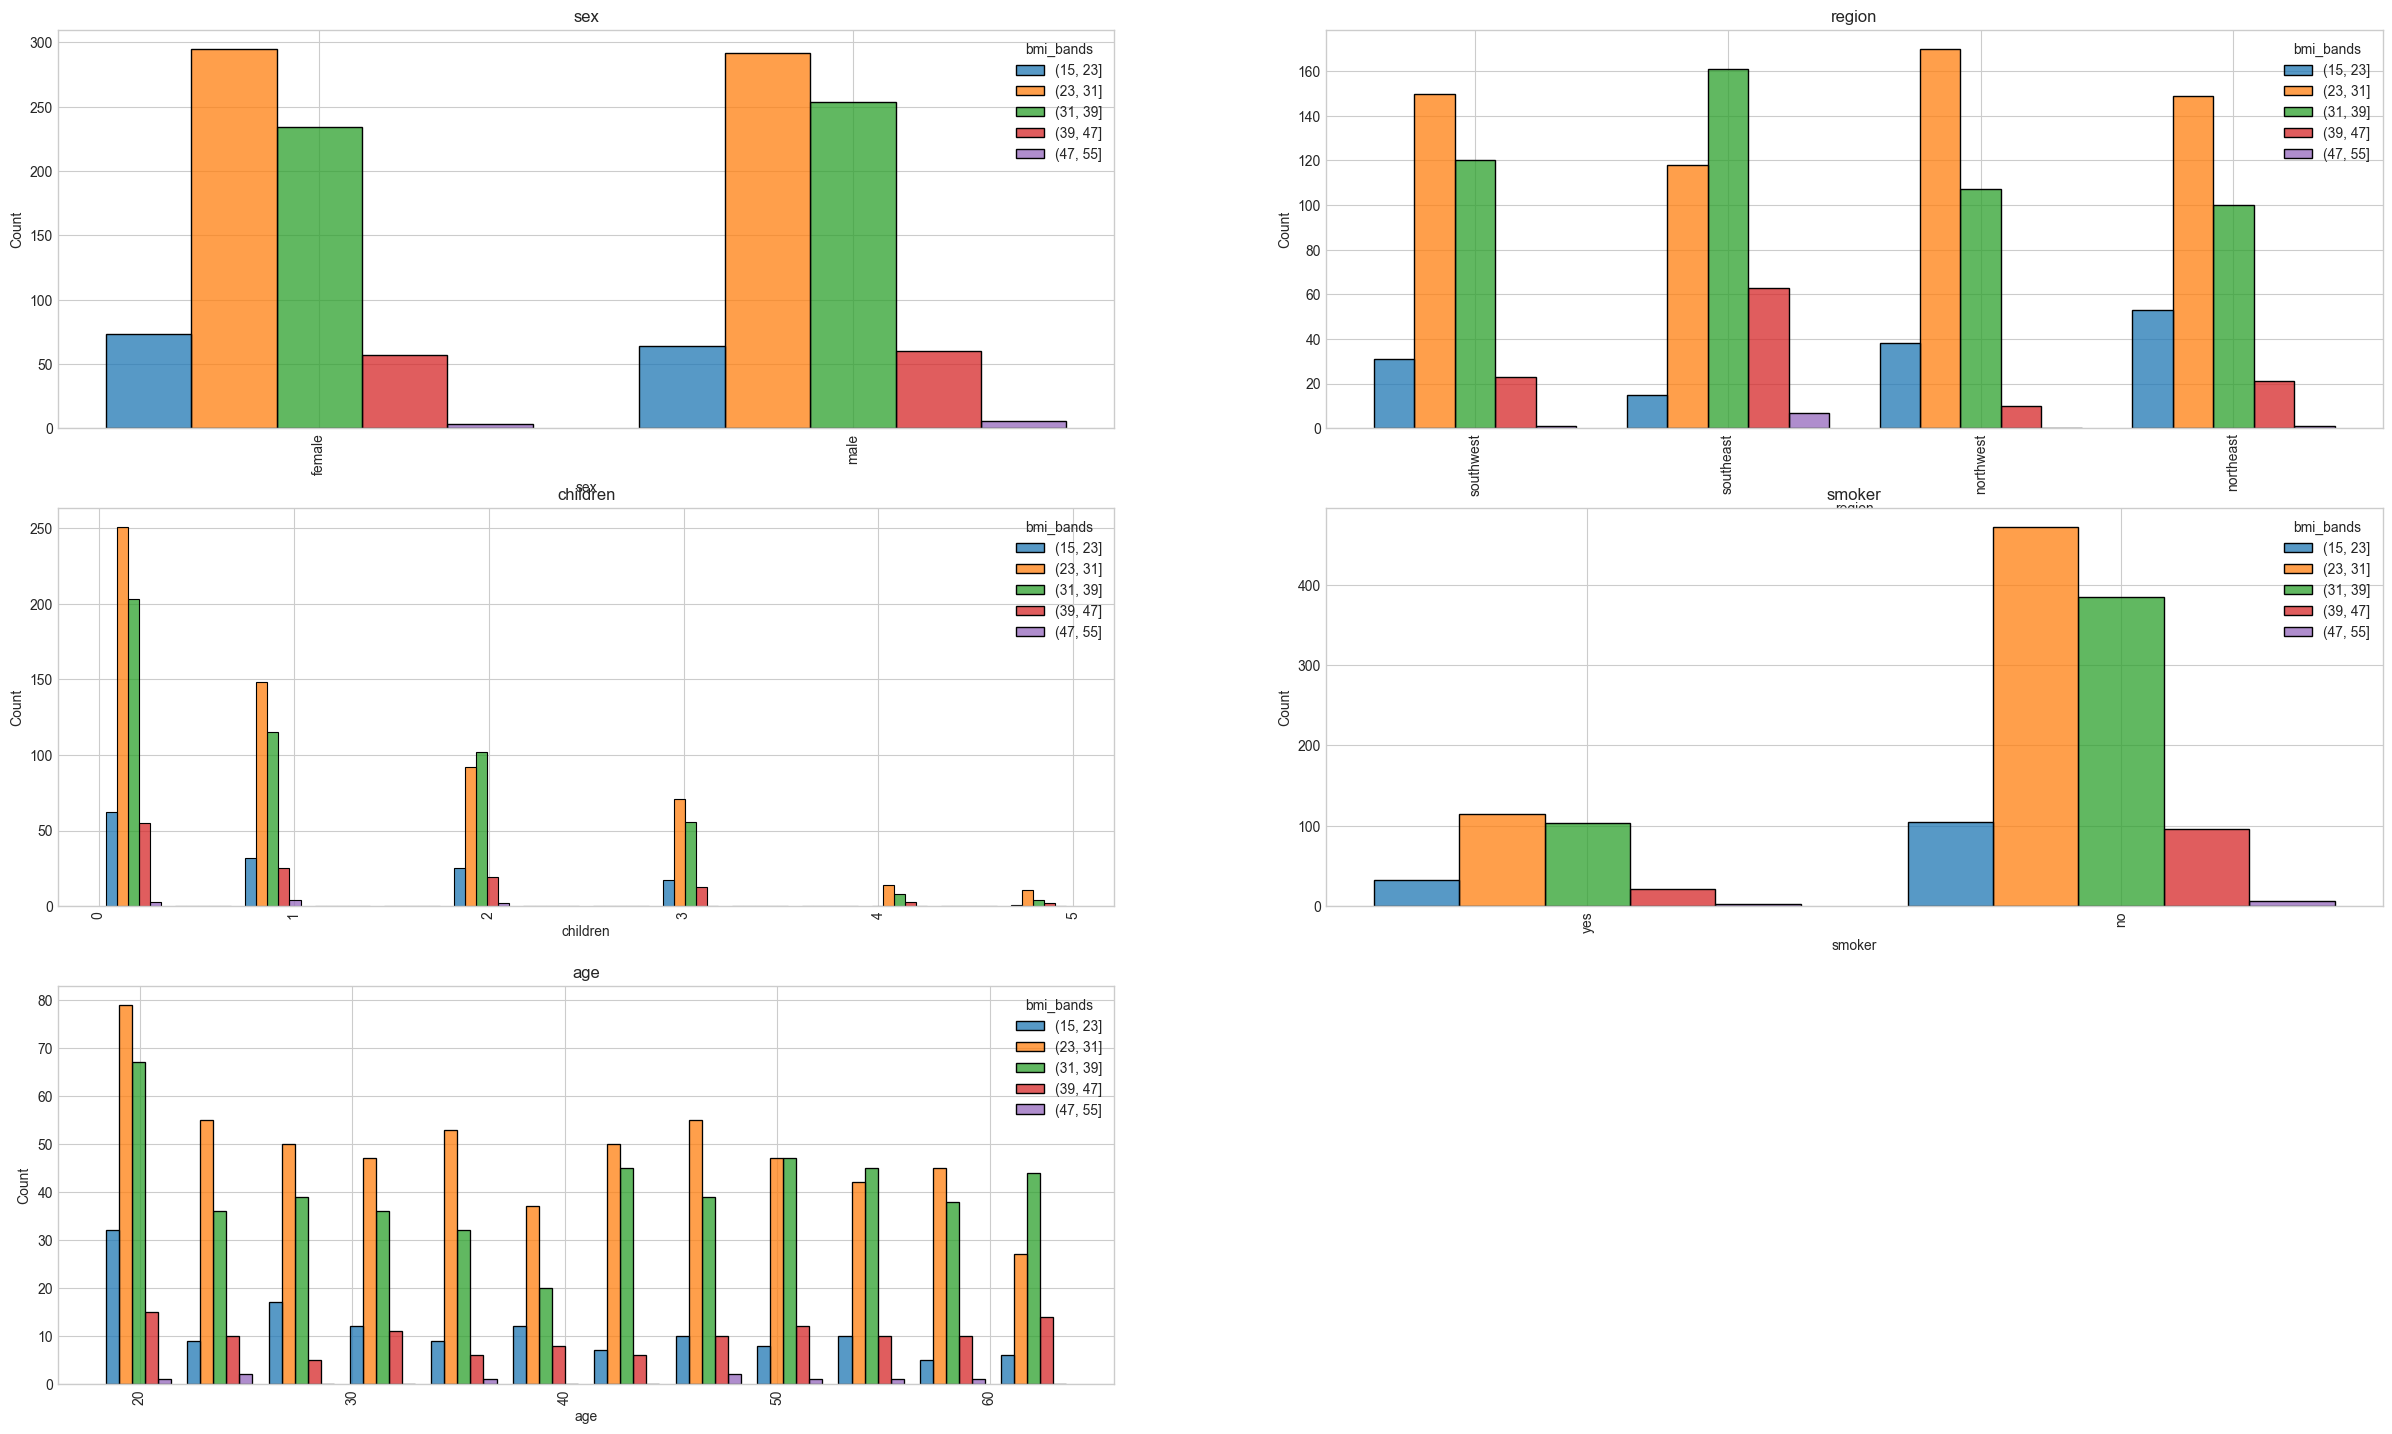

In [219]:
temp = insurance.copy()
temp['bmi_bands'] = pd.cut(temp['bmi'], bins=pd.interval_range(start=15, freq=8, end=55))
temp['age_bands'] = pd.cut(temp['bmi'], bins=pd.interval_range(start=15, freq=10, end=65))

count = 1
plt.figure(figsize=(30,30))
cols = ['sex', 'region', 'children', 'smoker', 'age']
for col in cols:
    plt.subplot(5,2,count)
    #sns.histplot(data = insurance, x = col, hue = 'region', multiple="dodge", shrink=.8)
    if col == 'bmi':
        sns.histplot(data = temp, x = col, hue = 'bmi_bands', multiple="dodge", shrink=.8, bins = 10)
    if col != 'bmi':
        sns.histplot(data = temp, x = col, hue = 'bmi_bands', multiple="dodge", shrink=.8)
        
    plt.xticks(rotation = 90)
    plt.title(col)
    count += 1

#### Distribution of independent variables vs the dependant variable charges
 - **the violion plot for smokers show that smokers tend to have higher charges and greater span of possible premiums compared to non-smoker**
 - **and again higher the age higher the charges (but only slightly)**

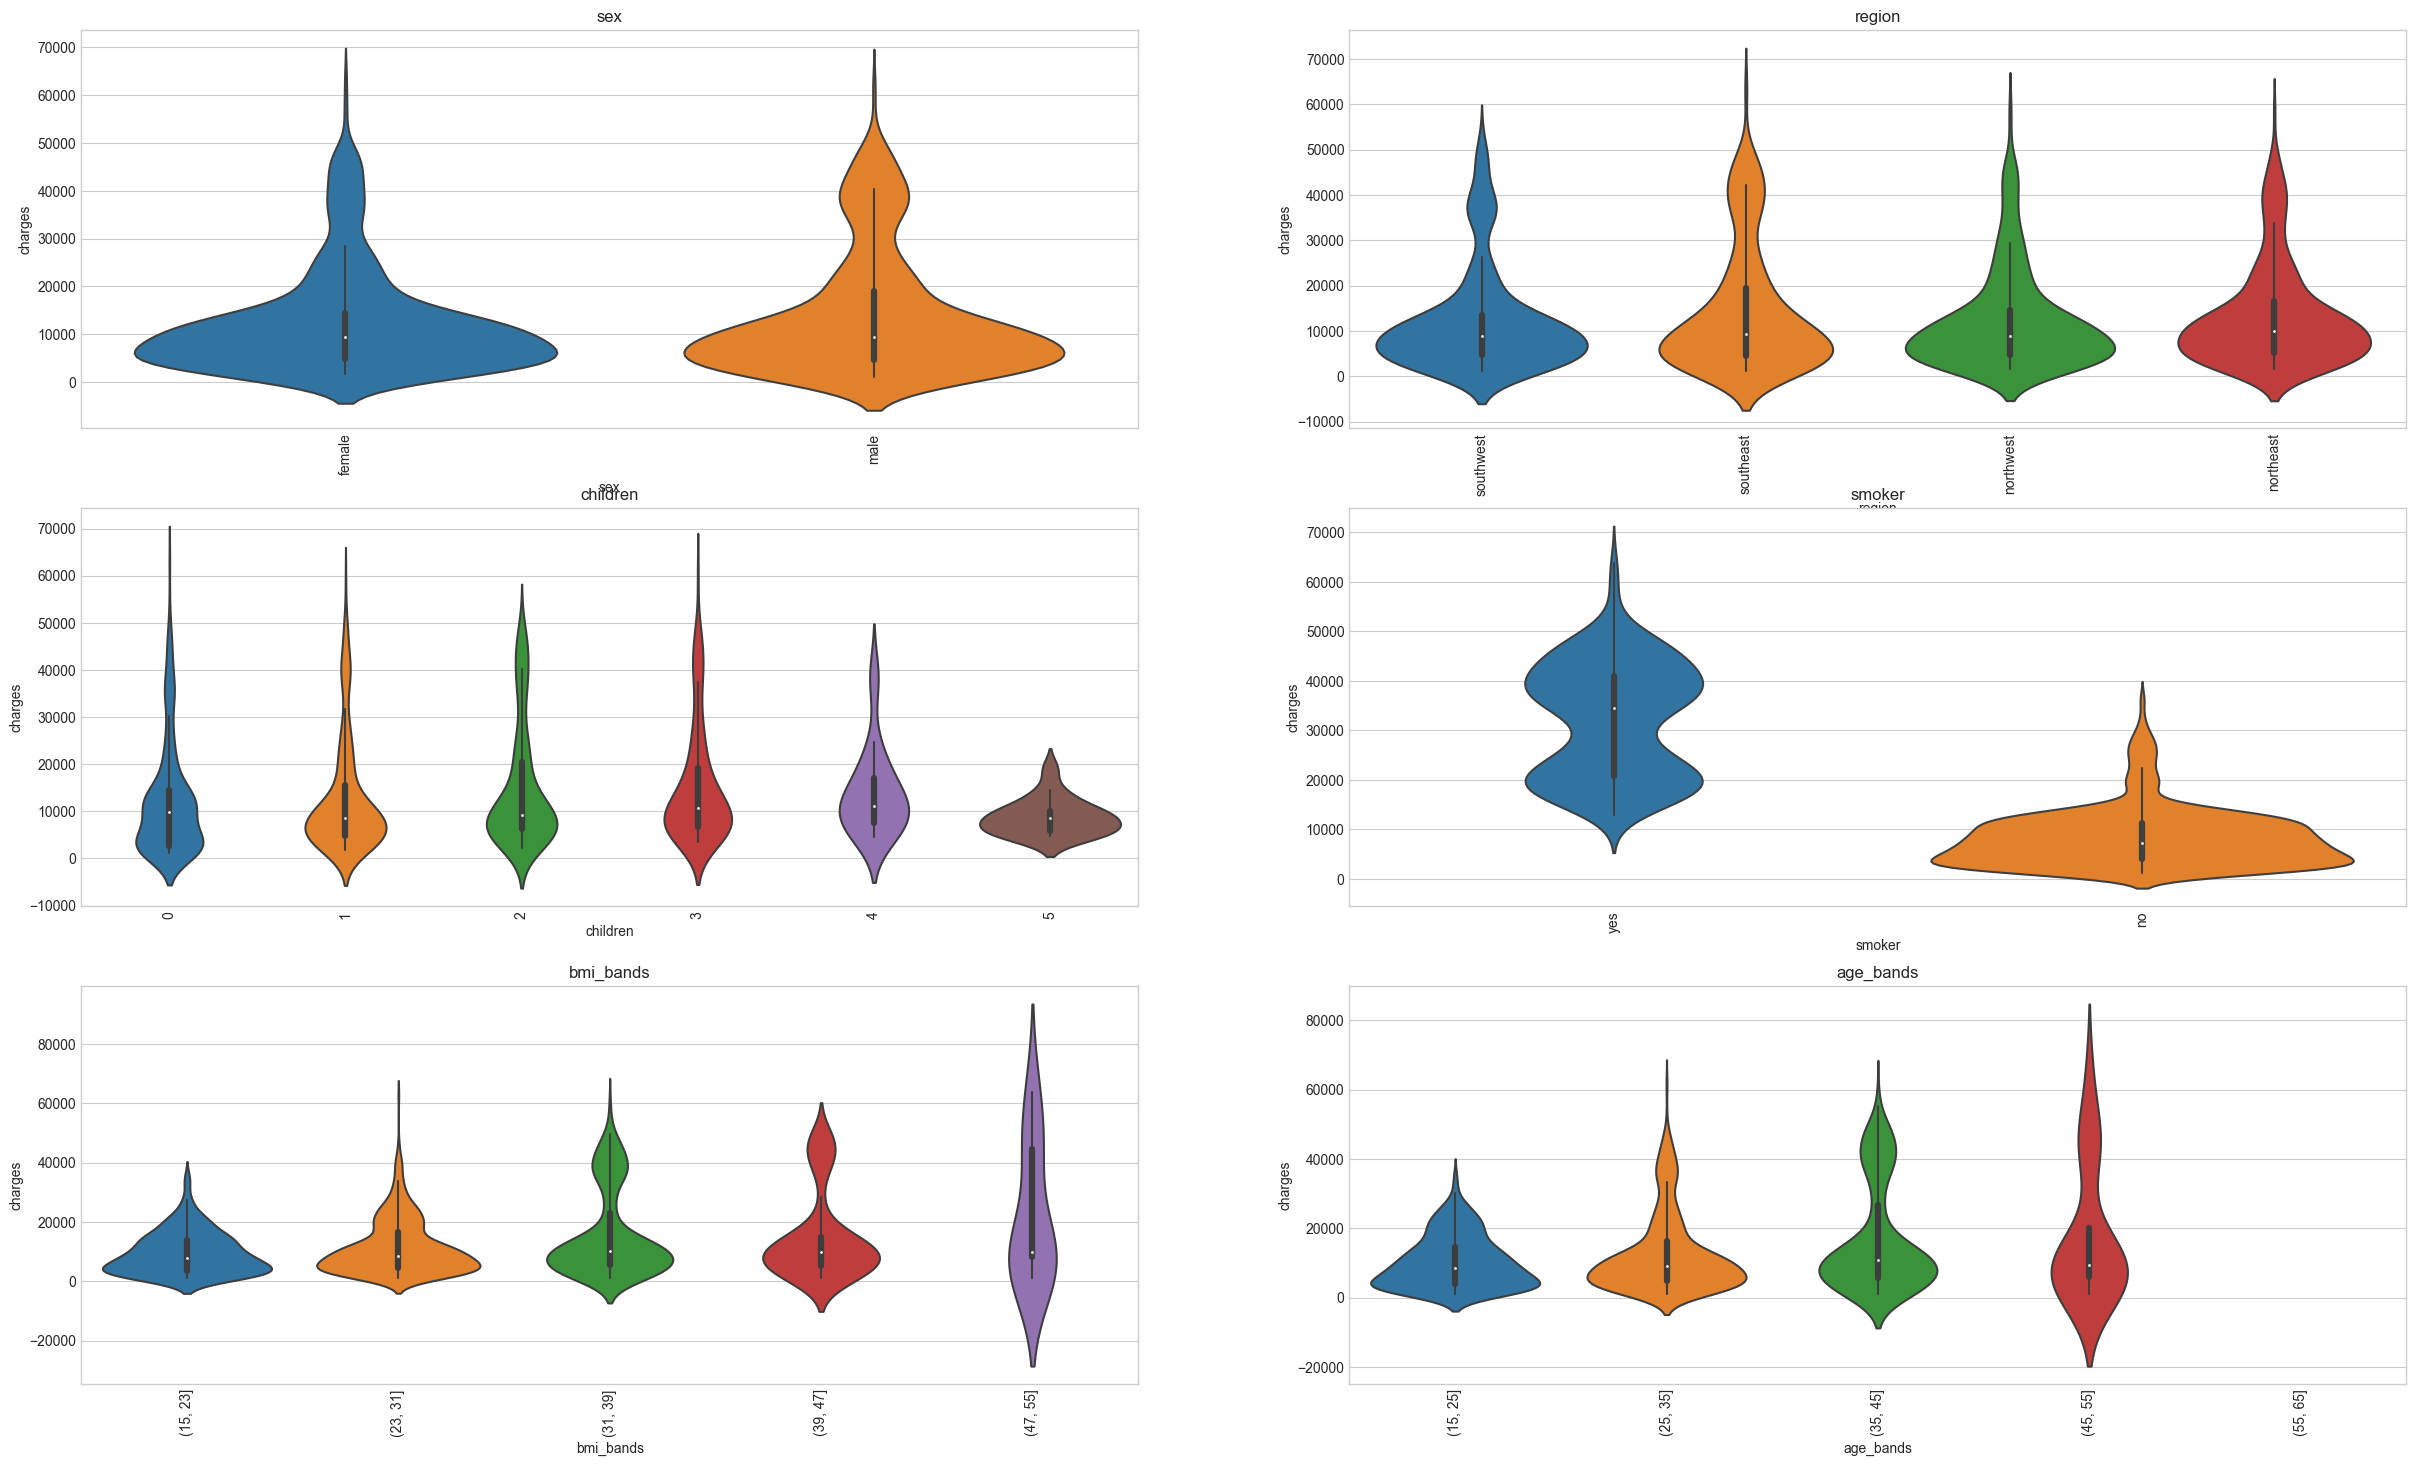

In [220]:
count = 1
plt.figure(figsize=(30,30))
cols = ['sex', 'region', 'children', 'smoker', 'bmi_bands', 'age_bands']
for col in cols:
    plt.subplot(5,2,count)
    sns.violinplot(data = temp, x = col, y = 'charges')
    
        
    plt.xticks(rotation = 90)
    plt.title(col)
    count += 1

 - **premium is getting higher for smokers higher the bmi bands**
 - **the same trend for smokers is also with increasing ages**

<AxesSubplot: xlabel='age_bands', ylabel='charges'>

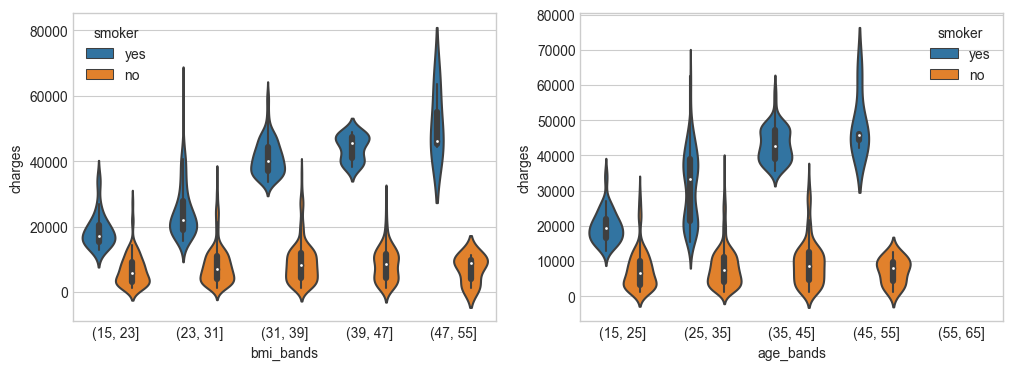

In [221]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(121)
sns.violinplot(data = temp, x = 'bmi_bands', y = 'charges', hue = 'smoker')

ax2 = fig.add_subplot(122)
sns.violinplot(data = temp, x = 'age_bands', y = 'charges', hue = 'smoker')


**This is quite interesting, when I compare men and women in the highest BMIs, women tend to have greater and higher span of premiums, but negative charges values are not making sense**

<AxesSubplot: xlabel='sex', ylabel='charges'>

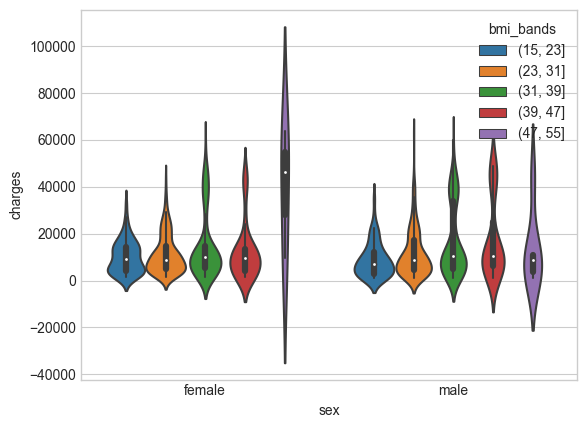

In [222]:
sns.violinplot(data = temp, x = 'sex', y = 'charges', hue = 'bmi_bands')

In [223]:
#adding correlation of discrete variables
categorical_columns = ['sex','children', 'smoker', 'region']
insurance_encode = pd.get_dummies(data = insurance, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [224]:
insurance_encode

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [225]:
#transform dependant variable to normal distribution

#1.box-cox transformation
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(insurance_encode['charges'],alpha=0.05)

#confidence interaval negative value, charges can't be negative
ci,lam
temp['charges_bc'] = y_bc

In [226]:
ci

(-0.01140290617294196, 0.0988096859767545)

#### Transformation of dependant variable on multiple scales

Text(0.5, 1.0, 'Distribution of insurance charges in $box-cox$ scale')

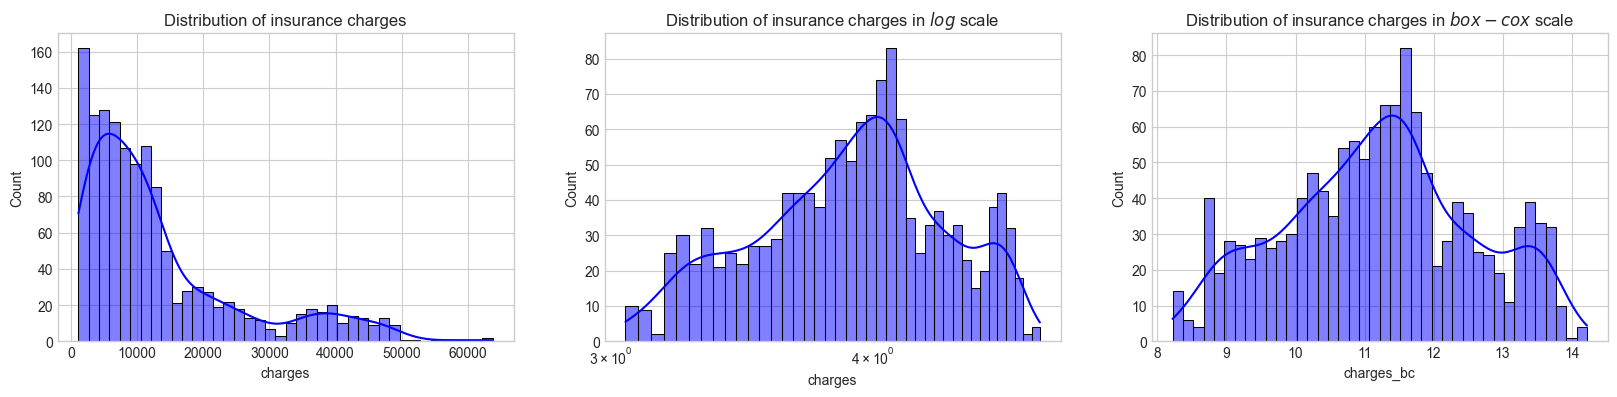

In [227]:
fig = plt.figure(figsize = (20,4))
ax1 = fig.add_subplot(131)
sns.histplot(data = insurance, x = 'charges', bins = 40, color = 'blue', kde = True) 
ax1.set_title('Distribution of insurance charges')

ax2 = fig.add_subplot(132)
sns.histplot(np.log10(insurance['charges']),bins=40, color='b', kde = True)
ax2.set_title('Distribution of insurance charges in $log$ scale')
ax2.set_xscale('log')

ax3 = fig.add_subplot(133)
sns.histplot(data = temp, x = 'charges_bc', bins = 40, color = 'blue', kde = True) 
ax3.set_title('Distribution of insurance charges in $box-cox$ scale')


### Trying to get confidence intervals of transformed charges column but box cox intervals are not the same, as from the box cox formula, why?

In [228]:
stats = insurance['charges'].agg(['mean', 'sem'])
stats_bc = temp['charges_bc'].agg(['mean', 'sem'])

In [229]:
print('confidence interval charges: (', stats['mean'] - 1.96* stats['sem'], '-', stats['mean'] + 1.96* stats['sem'], ')')
print('confidence interval box cox charges: (',stats_bc['mean'] - 1.96* stats_bc['sem'], '-', stats_bc['mean'] + 1.96* stats_bc['sem'], ')')

confidence interval charges: ( 12621.530054682518 - 13919.314475599995 )
confidence interval box cox charges: ( 11.12454191935512 - 11.270998827725055 )


In [230]:
#another way of get the CI
import scipy.stats as st
st.t.interval(alpha=0.95, df=len(y_bc)-1,
              loc=np.mean(y_bc),
              scale=st.sem(y_bc))

C:\Users\marti\AppData\Local\Temp\ipykernel_2704\1490187511.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(y_bc)-1,


(11.124476914583337, 11.27106383249684)

### ...continue

In [231]:
insurance_encode['charges'] = np.log(insurance_encode['charges'])

In [232]:
insurance_encode.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,9.734176,0,0,0,0,0,0,1,0,0,1
1,18,33.770,7.453302,1,1,0,0,0,0,0,0,1,0
2,28,33.000,8.400538,1,0,0,1,0,0,0,0,1,0
3,33,22.705,9.998092,1,0,0,0,0,0,0,1,0,0
4,32,28.880,8.260197,1,0,0,0,0,0,0,1,0,0


### Train Test Split

In [233]:
from sklearn.model_selection import train_test_split

X = insurance_encode.drop('charges', axis = 1)
y = insurance_encode['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [234]:
X_test.head()

,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
918,61,28.200,0,0,0,0,0,0,0,0,0,1
755,31,27.645,1,0,1,0,0,0,0,0,0,0
207,35,27.740,1,0,1,0,0,0,1,0,0,0
520,50,27.360,0,0,0,0,0,0,0,0,0,0
695,26,40.185,0,0,0,0,0,0,0,1,0,0


In [235]:
#ask about x0 = 1 the In this step build model using our linear regression equation  θ=(XTX)−1XTy . 
#In first step we need to add a feature  x0=1  to our original data set.

In [236]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8, 9], [10, 11, 12]])

Manual function

In [237]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))
theta

array([ 7.05917147,  0.03313425,  0.01351684, -0.06776735,  0.14945669,
        0.27291869,  0.24409489,  0.52333863,  0.46603008,  1.55048077,
       -0.05584487, -0.14657831, -0.13350812])

Built-in function

In [238]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Comparing manual custom and built-in results

In [239]:
pd.DataFrame({'Columns':['intercept'] + list(X_train.columns.values),'Theta':theta, 
             'Theta_SK':[lm.intercept_] + list(lm.coef_)})

,Columns,Theta,Theta_SK
0,intercept,7.059171,7.059171
1,age,0.033134,0.033134
2,bmi,0.013517,0.013517
3,OHE_male,-0.067767,-0.067767
4,OHE_1,0.149457,0.149457
5,OHE_2,0.272919,0.272919
6,OHE_3,0.244095,0.244095
7,OHE_4,0.523339,0.523339
8,OHE_5,0.466030,0.466030
9,OHE_yes,1.550481,1.550481


Model evaluation

In [240]:
# sklearn regression module
y_pred_sk = lm.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lm.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981898
R square obtain for scikit learn library is : 0.7795687545055318


Linear model assumptions

    1. Linear relationship between dependant and independant variables
    2. Residuals normally distributed and their mean = 0

Text(0.5, 0, 'Residuals')

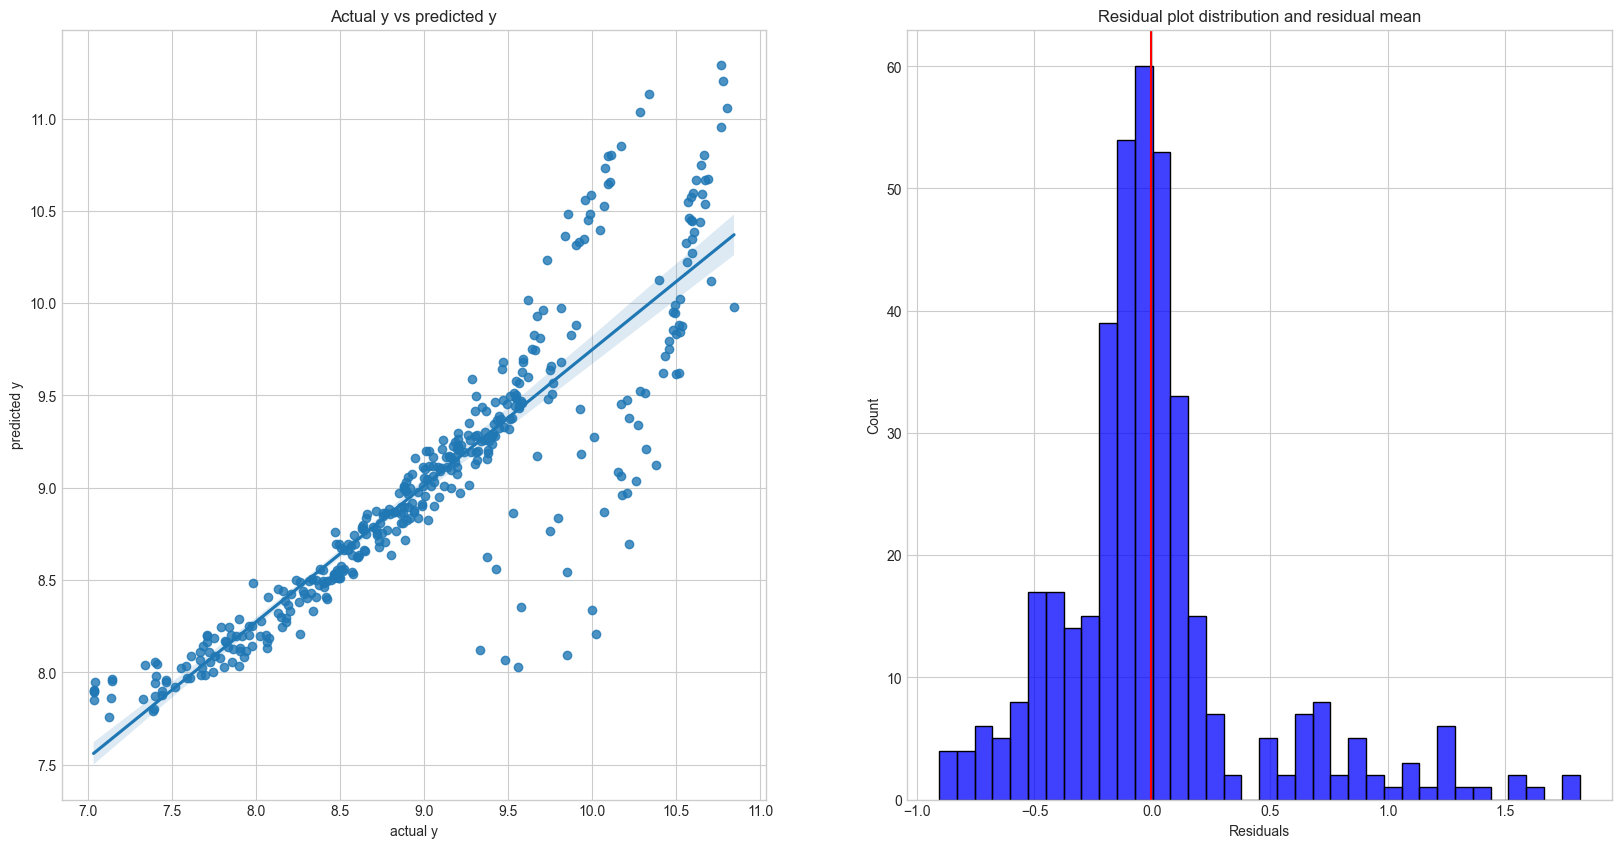

In [241]:
fig = plt.figure(figsize = (20,10))

fig.add_subplot(1,2,1)
sns.regplot(x = y_test,y = y_pred_sk)
plt.title('Actual y vs predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')


fig.add_subplot(1,2,2)
sns.histplot((y_test - y_pred_sk),color='b')
plt.axvline((y_test - y_pred_sk).mean(), color = 'r')
plt.title('Residual plot distribution and residual mean')
plt.xlabel('Residuals')

    3. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
    4. Homoskedasticity

Text(0.5, 1.0, 'Check for Homoscedasticity: \nResidual Vs Predicted')

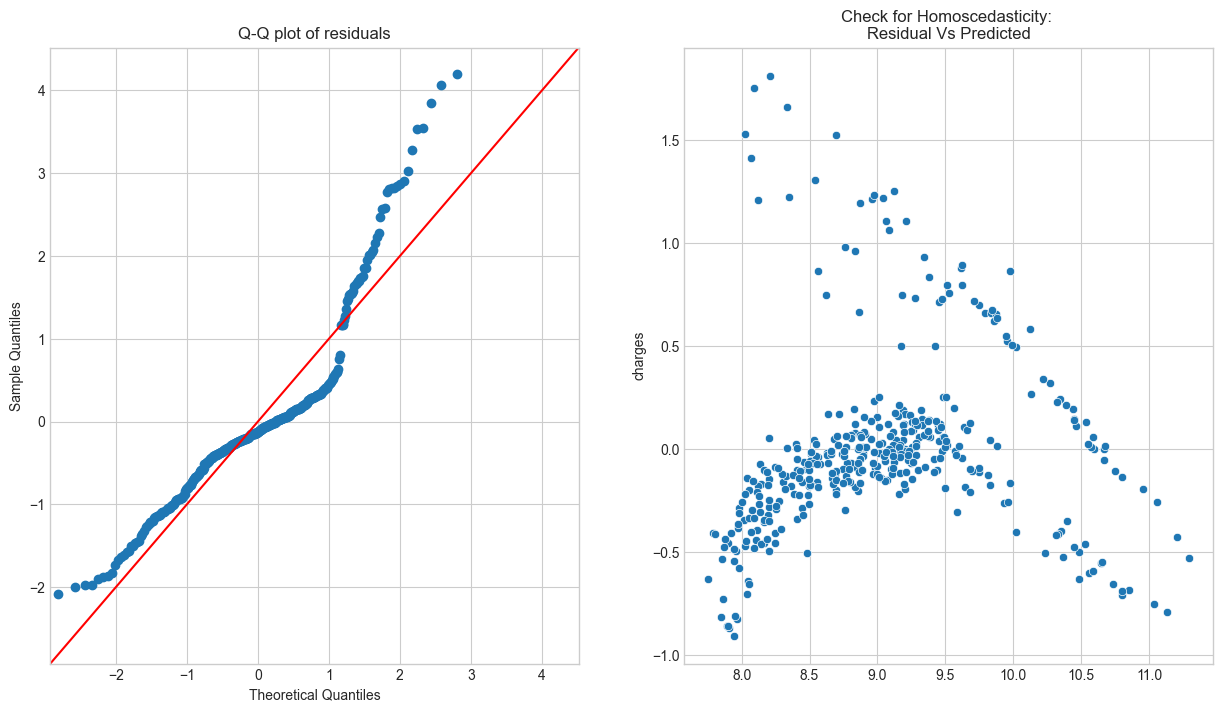

In [242]:
fig, axes = plt.subplots(1, 2, figsize = (15,8))
sm.qqplot((y_test - y_pred_sk), line ='45', fit = True, ax = axes[0])
axes[0].set_title('Q-Q plot of residuals')
sns.scatterplot(y = (y_test - y_pred_sk), x = y_pred_sk, ax = axes[1])
axes[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted')

   5. Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.<br> The variance inflation factor **VIF** identifies correlation between independent variables and strength of that correlation.  
    $$VIF=\frac{1}{1−R^2} $$ <br>If VIF > 1 & VIF <5 moderate correlation <br> VIF < 5 critical level of multicollinearity.

In [243]:
VIF = 1/(1- R_square_sk)
VIF

4.536561945911135

# Feature selection with decision tree

overfitting and underfitting, cross-validation

In [244]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [245]:
#target variable
X = insurance.drop(['charges'], axis=1)
y = insurance['charges']

In [246]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [247]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((896, 6), (442, 6))

In [248]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [249]:
X_train.head()

,age,sex,bmi,children,smoker,region
1046,43,female,25.080,0,no,northeast
682,39,male,35.300,2,yes,southwest
1037,45,female,30.495,1,yes,northwest
490,19,female,32.900,0,no,southwest
39,60,male,39.900,0,yes,southwest


In [250]:
# import category encoders

import category_encoders as ce

In [251]:
encoder = ce.OrdinalEncoder(cols=['sex', 'smoker', 'region', 'children'])

In [252]:
X_train = encoder.fit_transform(X_train).drop(columns = ['age','bmi'], axis = 1)
X_test = encoder.transform(X_test).drop(columns = ['age','bmi'], axis = 1)

In [254]:
X_train.head()

,sex,children,smoker,region
1046,1,1,1,1
682,2,2,2,2
1037,1,3,2,3
490,1,1,1,2
39,2,1,2,2


In [255]:
X_test.head()

,sex,children,smoker,region
764,1,2,1,1
887,1,1,1,3
890,1,1,2,3
1293,2,4,1,3
259,2,1,2,3


Gini coefficient

In [256]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'